In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from nltk.corpus import stopwords
import pprint

In [127]:
features = ['Category',
'Item',
'Serving Size',
'Calories',
'Calories from Fat',
'Total Fat',
'Saturated Fat',
'Trans Fat',
'Cholesterol',
'Sodium',
'Carbohydrates',
'Dietary Fiber',
'Sugars',
'Protein',
'Vitamin A (% Daily Value)',
'Vitamin C (% Daily Value)',
'Calcium (% Daily Value)',
'Iron (% Daily Value)']

dataset = pd.read_csv('menu.csv',header=0,usecols=features)

In [128]:
dataset.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


In [129]:
df = dataset.drop(["Category","Item","Serving Size"],axis=1)

In [130]:
z = np.abs(stats.zscore(df))
print(np.where(z > 7))

print(dataset.iloc[82])
dataset = dataset.drop([82],axis=0)

(array([ 82,  82, 135]), array([ 1,  2, 12]))
Category                                   Chicken & Fish
Item                         Chicken McNuggets (40 piece)
Serving Size                              22.8 oz (646 g)
Calories                                             1880
Calories from Fat                                    1060
Total Fat                                             118
Saturated Fat                                          20
Trans Fat                                               1
Cholesterol                                           265
Sodium                                               3600
Carbohydrates                                         118
Dietary Fiber                                           6
Sugars                                                  1
Protein                                                87
Vitamin A (% Daily Value)                               0
Vitamin C (% Daily Value)                              15
Calcium (% Daily Value)   

In [131]:
normalized_df=(df-df.mean())/df.std()
normalized_df["Category"] = dataset[["Category"]]
normalized_df.head(5)

,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
0,-0.284136,-0.055492,-0.082035,-0.189349,-0.475019,2.349713,0.440621,-0.578579,1.511262,-0.921313,0.320453,-0.140641,-0.323949,0.236600,0.832875,Breakfast
1,-0.492235,-0.446497,-0.433999,-0.565157,-0.475019,-0.343103,0.475282,-0.613975,1.511262,-0.921313,0.407971,-0.304802,-0.323949,0.236600,0.030423,Breakfast
2,0.007203,0.570114,0.621893,0.374362,-0.475019,-0.113927,0.492612,-0.649370,1.511262,-0.956181,0.057897,-0.222722,-0.323949,0.236600,0.259695,Breakfast
3,0.340162,0.961118,0.973857,0.750170,-0.475019,2.636183,0.631254,-0.613975,1.511262,-0.956181,0.670527,0.064559,-0.323949,0.530373,0.832875,Breakfast
4,0.132063,0.648315,0.621893,0.374362,-0.475019,-0.056633,0.665914,-0.613975,1.511262,-0.956181,0.670527,-0.304802,-0.323949,0.236600,0.259695,Breakfast


In [132]:
len(dataset)

259

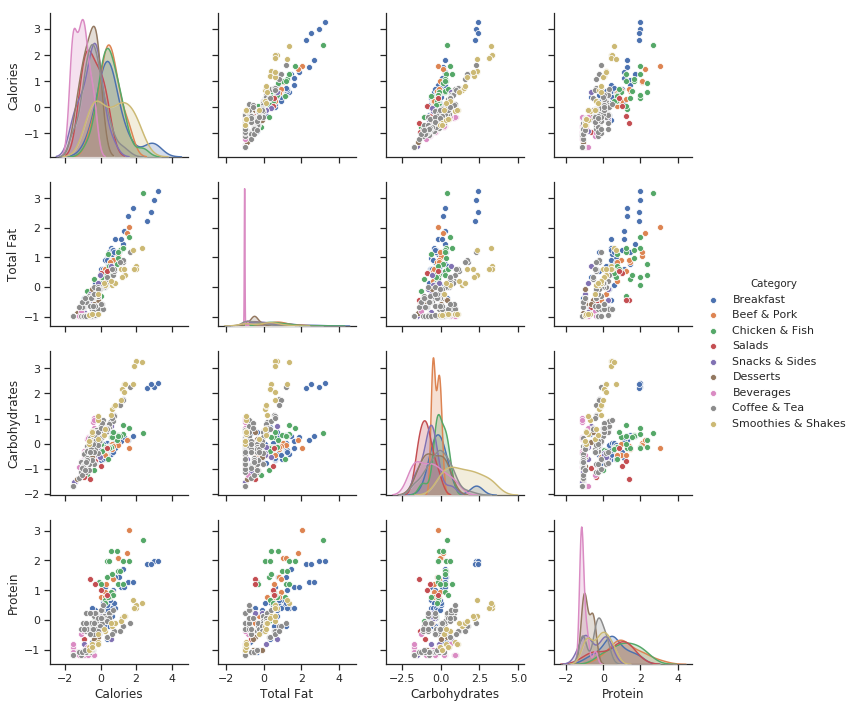

In [133]:
plotData = normalized_df[["Category","Calories","Total Fat","Carbohydrates","Protein"]]

sns.set(style="ticks")
sns.pairplot(plotData, hue="Category")

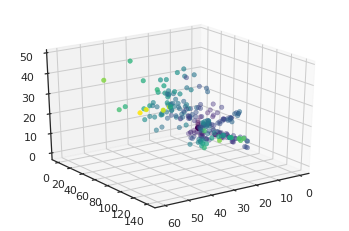

In [148]:
x = dataset["Total Fat"]
y = dataset["Carbohydrates"]
z = dataset["Protein"]
c = dataset["Calories"]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=c, cmap='viridis', linewidth=0.5);

ax.view_init(25,55)

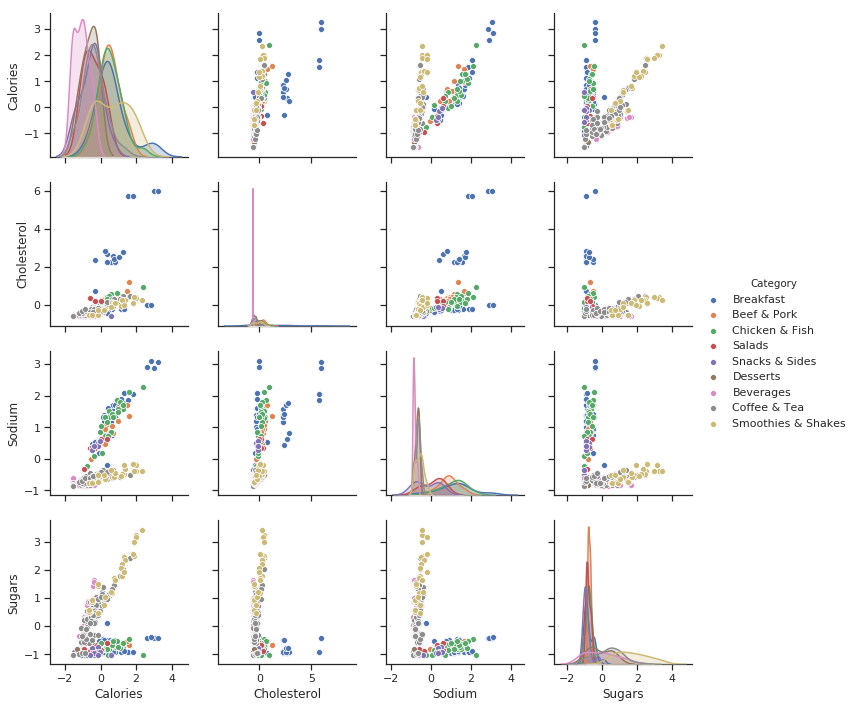

In [149]:
plotData = normalized_df[["Category","Calories","Cholesterol","Sodium","Sugars"]]

sns.set(style="ticks")
sns.pairplot(plotData, hue="Category")

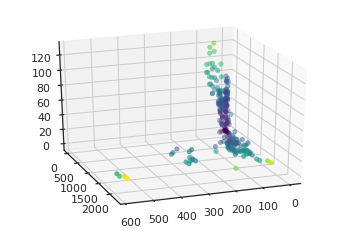

In [151]:
x = dataset["Cholesterol"]
y = dataset["Sodium"]
z = dataset["Sugars"]
c = dataset["Calories"]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=c, cmap='viridis', linewidth=0.5);

ax.view_init(25,70)

In [42]:
points = dataset.drop(['Category','Item','Serving Size'],axis=1)
points

dbScoreList = []

for i in range(2,21):
    clusterCount = i
    kmeans = KMeans(n_clusters=i)
    clusters = kmeans.fit_predict(points)

    dbScore = davies_bouldin_score(points,clusters)
    dbScoreList.append(dbScore)


clusterList = list(clusters)
dbScoreList

/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountere

[0.5191634248113493,
 0.5889128600010322,
 0.7766018121414049,
 0.6918546969915693,
 0.6027521501491205,
 0.6675483847443326,
 0.7260521698200633,
 0.741611353784824,
 0.7974493913386422,
 0.8224892823687724,
 0.8791443524583454,
 0.7681326862546989,
 0.7372155454850132,
 0.827253685696008,
 0.7848030981183922,
 0.7708143230889207,
 0.7869650224267202,
 0.8038811053684654,
 0.8794171237658107]

In [25]:
foodClusters = list(zip(list(dataset['Item'].values),clusterList))
foodClusters = pd.DataFrame(foodClusters,columns=['Item','Cluster'])

In [10]:
for i in range(clusterCount):
    foodText = list(foodClusters[foodClusters['Cluster'] == i]['Item'])
    pprint.pprint(foodText)
    print("----------------------------------------------------------")
    #print(topFoods(foodText,3))

['Hash Brown',
 'Fruit & Maple Oatmeal',
 'Fruit & Maple Oatmeal without Brown Sugar',
 'Hamburger',
 'Chicken McNuggets (4 piece)',
 'Premium Bacon Ranch Salad (without Chicken)',
 'Premium Southwest Salad (without Chicken)',
 'Small French Fries',
 'Medium French Fries',
 'Kids French Fries',
 'Side Salad',
 'Apple Slices',
 "Fruit 'n Yogurt Parfait",
 'Baked Apple Pie',
 'Chocolate Chip Cookie',
 'Oatmeal Raisin Cookie',
 'Kids Ice Cream Cone',
 'Hot Fudge Sundae',
 'Hot Caramel Sundae',
 'Strawberry Sundae',
 'Coca-Cola Classic (Small)',
 'Coca-Cola Classic (Medium)',
 'Coca-Cola Classic (Large)',
 'Coca-Cola Classic (Child)',
 'Diet Coke (Small)',
 'Diet Coke (Medium)',
 'Diet Coke (Large)',
 'Diet Coke (Child)',
 'Dr Pepper (Small)',
 'Dr Pepper (Medium)',
 'Dr Pepper (Large)',
 'Dr Pepper (Child)',
 'Diet Dr Pepper (Small)',
 'Diet Dr Pepper (Medium)',
 'Diet Dr Pepper (Large)',
 'Diet Dr Pepper (Child)',
 'Sprite (Small)',
 'Sprite (Medium)',
 'Sprite (Large)',
 'Sprite (Child)